<a href="https://colab.research.google.com/github/prakhar-kt/Tensorflow-deep-learning/blob/main/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the required libraries

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model

Load the CIFAR10 dataset and get the train and test set

In [ ]:
cifar = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar.load_data()
# Normalize the input 
x_train, x_test = x_train/255.0, x_test/255.0
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")


170508288/170498071 [==============================] - 6s 0us/step
x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)
y_train shape: (50000, 1)
y_test.shape: (10000, 1)


As the labels are 2-dimensional, we will flatten the shapes to get one-dimensional vectors

In [ ]:
y_train, y_test = y_train.flatten(), y_test.flatten()
print(f"y_train shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")

y_train shape: (50000,)
y_test.shape: (10000,)


Get the number of classes

In [ ]:
k = len(set(y_train))
print(f"No of classes:", k)

No of classes: 10


#### Build the model using Functional Api

In [ ]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(10, activation='softmax')(x)

model = Model(i,x)


#### Compile and fit the model

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=[x_test, y_test], epochs=20)

Epoch 1/20
1563/1563 [==============================] - 18s 4ms/step - loss: 1.5119 - accuracy: 0.4489 - val_loss: 1.2461 - val_accuracy: 0.5534
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1870 - accuracy: 0.5781 - val_loss: 1.0710 - val_accuracy: 0.6191
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0341 - accuracy: 0.6350 - val_loss: 1.0202 - val_accuracy: 0.6414
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9144 - accuracy: 0.6747 - val_loss: 0.9288 - val_accuracy: 0.6713
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8308 - accuracy: 0.7047 - val_loss: 0.9038 - val_accuracy: 0.6789
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7491 - accuracy: 0.7319 - val_loss: 0.8897 - val_accuracy: 0.6914
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6779 - accuracy: 0.7588 - val_loss: 0.8585 - val_accuracy

#### Plot Loss and Accuracy Curves

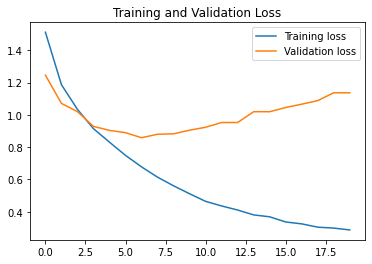

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend();

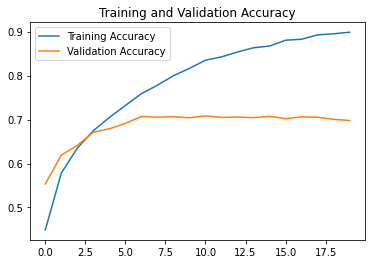

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend();

#### The model is clearly overfitting here as training loss keeps on going down , whereas the validation loss just plateaus out after 3 epochs

### Builiding the model using BatchNormalisation, increasing pooling layers, changing padding to same, using maxpooling, and strides of 1 instead of 2

In [ ]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), padding='same',activation='relu')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), padding='same',activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(64, (3,3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(128, (3,3), padding='same',activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(10, activation='softmax')(x)

model_1 = Model(i,x)



Compile and fit the model

In [ ]:
model_1.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
model_1.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50 )

Epoch 1/50
1563/1563 [==============================] - 488s 311ms/step - loss: 1.2916 - accuracy: 0.5542 - val_loss: 1.3737 - val_accuracy: 0.5569
Epoch 2/50
1563/1563 [==============================] - 476s 305ms/step - loss: 0.8418 - accuracy: 0.7067 - val_loss: 0.8342 - val_accuracy: 0.7160
Epoch 3/50
1563/1563 [==============================] - 480s 307ms/step - loss: 0.6935 - accuracy: 0.7630 - val_loss: 0.7302 - val_accuracy: 0.7540
Epoch 4/50
1563/1563 [==============================] - 476s 304ms/step - loss: 0.5856 - accuracy: 0.7995 - val_loss: 0.6972 - val_accuracy: 0.7728
Epoch 5/50
1563/1563 [==============================] - 475s 304ms/step - loss: 0.5074 - accuracy: 0.8261 - val_loss: 0.7883 - val_accuracy: 0.7425
Epoch 6/50
1563/1563 [==============================] - 478s 306ms/step - loss: 0.4221 - accuracy: 0.8541 - val_loss: 0.6098 - val_accuracy: 0.8024
Epoch 7/50
1563/1563 [==============================] - 479s 306ms/step - loss: 0.3584 - accuracy: 0.8760 - val_

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0]//batch_size
history_3 = model_1.fit_generator(train_generator, validation_data=[x_test, y_test],
                                  steps_per_epoch=steps_per_epoch,
                                  epochs=50)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


1562/1562 [==============================] - 26s 16ms/step - loss: 0.5473 - accuracy: 0.8263 - val_loss: 0.4873 - val_accuracy: 0.8427
Epoch 2/50
1562/1562 [==============================] - 25s 16ms/step - loss: 0.4340 - accuracy: 0.8571 - val_loss: 0.4753 - val_accuracy: 0.8449
Epoch 3/50
1562/1562 [==============================] - 26s 16ms/step - loss: 0.4136 - accuracy: 0.8645 - val_loss: 0.5339 - val_accuracy: 0.8287
Epoch 4/50
1562/1562 [==============================] - 26s 16ms/step - loss: 0.3857 - accuracy: 0.8727 - val_loss: 0.4569 - val_accuracy: 0.8537
Epoch 5/50
1562/1562 [==============================] - 26s 17ms/step - loss: 0.3668 - accuracy: 0.8788 - val_loss: 0.4473 - val_accuracy: 0.8506
Epoch 6/50
1562/1562 [==============================] - 25s 16ms/step - loss: 0.3455 - accuracy: 0.8857 - val_loss: 0.4279 - val_accuracy: 0.8617
Epoch 7/50
1562/1562 [==============================] - 25s 16ms/step - loss: 0.3405 - accuracy: 0.8858 - val_loss: 0.4168 - val_accura

#### Plot the loss and accuracy curves


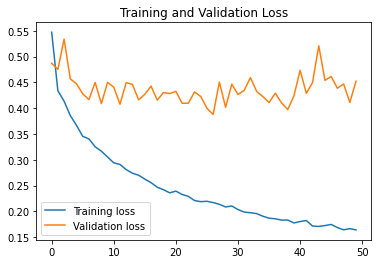

In [ ]:
plt.plot(history_3.history['loss'], label='Training loss')
plt.plot(history_3.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend();

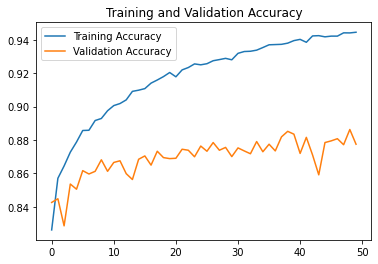

In [ ]:
plt.plot(history_3.history['accuracy'], label='Training Accuracy')
plt.plot(history_3.history['val_accuracy'],label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend();

### We see that even though the training accuracy has gone down, the validation accuracy has improved
